In [1]:
# project to classify the umages of the fashion_mnist data set -- consists of approx 70,000 images of types of clothings  , labeled under 10 classes

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
#loading the dataset

(train_images , train_labels) , (test_images , test_labels) = tf.keras.datasets.fashion_mnist.load_data()



In [3]:
# examination of the dataset

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)

print(train_labels)
print(len(train_labels))

print(test_images.shape)
print(test_labels)
print(len(test_labels))





(60000, 28, 28)
[9 0 0 ... 3 0 5]
60000
(10000, 28, 28)
[9 2 1 ... 8 1 5]
10000


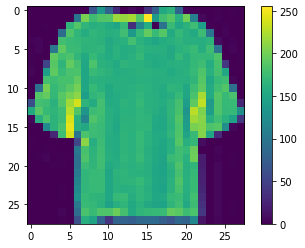

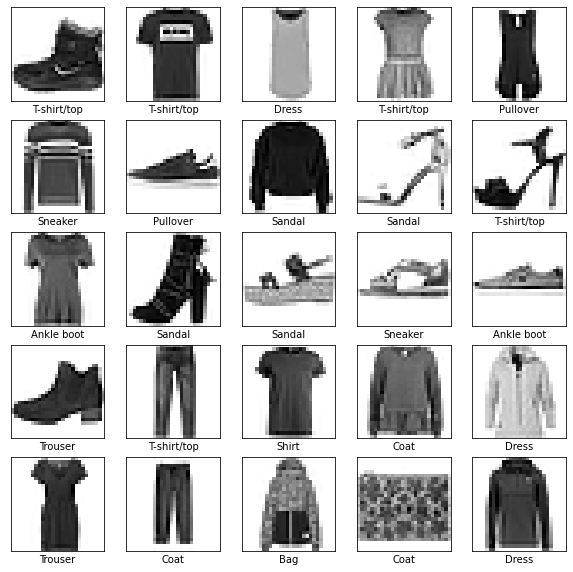

In [4]:
# preprocessing of the dataset

plt.figure()
plt.imshow(train_images[77])
plt.colorbar()
plt.grid(False)
plt.show()

#normalise the datset to so that the pixels are in the range of [0,1] before feeding it in to the ann

train_images  = train_images / 255.0
test_images = test_images/255.0


#verifying the normalisation by plotting the 25 examples 

plt.figure(figsize  = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+1]])
plt.show()


In [5]:
# defining / building the model 

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)) , 
        tf.keras.layers.Dense(128 , activation = 'relu') , 
        tf.keras.layers.Dense(10) # this layer returns the array of 10 logits each for each calss 
])

In [6]:
# optimozing the neural network 
 
model.compile(optimizer = 'adam'  , 
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) ,
               metrics = ['accuracy']
               )

'''Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified . '''


'Before the model is ready for training, it needs a few more settings. These are added during the model\'s compile step:\n\nLoss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.\n\nOptimizer —This is how the model is updated based on the data it sees and its loss function.\n\nMetrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified . '

In [7]:
#training the neural network with the training set data 
model.fit(train_images , train_labels , epochs = 10)  

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5032 - accuracy: 0.8221
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3747 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3361 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3122 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2952 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2807 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2675 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2494 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [8]:
# evaluating the model for loss and accuracy

test_loss , test_accu  = model.evaluate(test_images , test_labels , verbose = 2 )
print('test loss ' , test_loss)
print('test accuracy ' , test_accu )


313/313 - 1s - loss: 0.3467 - accuracy: 0.8836
test loss  0.3467097282409668
test accuracy  0.8835999965667725


In [10]:
# predictions on the basis of the model 

#input the 10 logits into the softmax function and find out the probabilty of each suitable output label
probability_model = tf.keras.Sequential([model , tf.keras.layers.Softmax()]) 

# this will predict the probabilties of the likeness of each label fro all the testing set images 
pred = probability_model.predict(test_images)

# lets check out the probabilty of labels of the firsty image 
print(pred[0])

#A prediction is an array of 10 numbers. 
# They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.
#  You can see which label has the highest confidence value by 

print(np.argmax(pred[0]))


# to verify your prediction , lets check for the label in the actual data set
print(test_labels[0])

[3.4539834e-08 6.2624550e-10 5.6000493e-09 1.8477659e-11 1.3279501e-10
 3.8372420e-04 1.9763149e-08 1.3678024e-03 8.0011340e-09 9.9824846e-01]
9
9


In [16]:
# plotting a curve for the particular prediction

def plot_image(i , predictions_array , true_label , img ):
    true_label , img = true_label[i] , img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img , cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label ==  true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(" {} {:2.0f}% ({}) ".format(class_names[predicted_label] , 100*np.max(predictions_array) , class_names[true_label] ) , 
                                           color =  color )


def plot_value_array(i , predictions_array , true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10) , predictions_array , color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



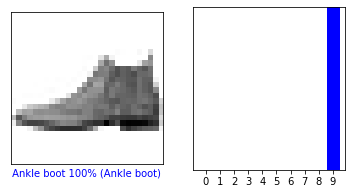

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_labels)
plt.show()

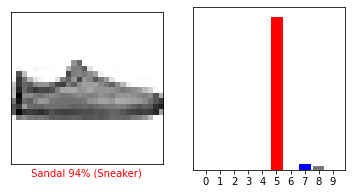

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_labels)
plt.show()

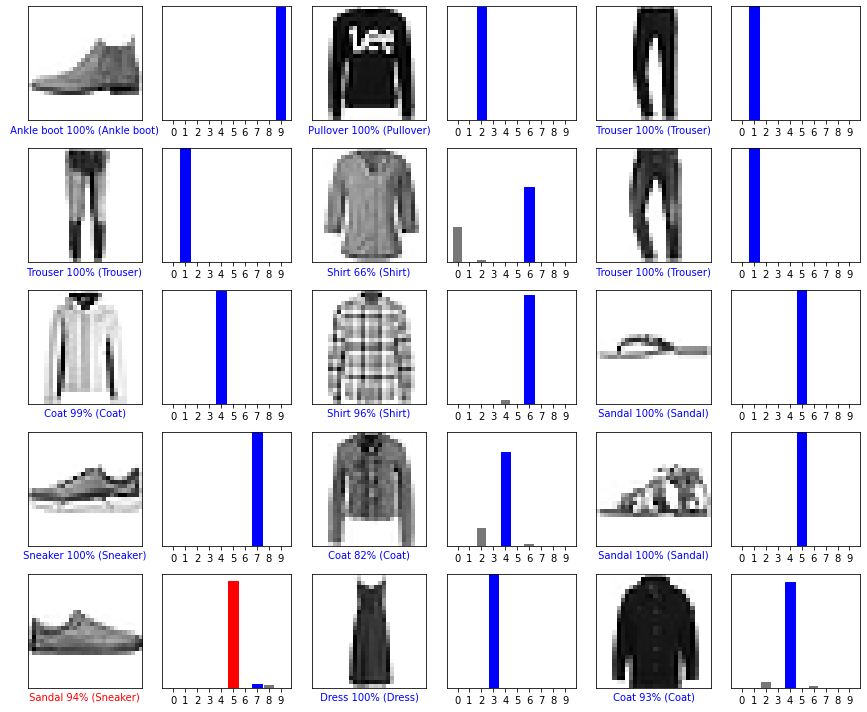

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], test_labels)
plt.tight_layout()
plt.show()